# Inaugural Project

**Imports, set magics and py.file:**

In [1]:
# magic to reload modules automatically
%load_ext autoreload
%autoreload 2

# Importing equations and standard packages
from Inauguralproject import *

# Question 1

**Subquestion 1**

In [2]:
# Defining parameters
par = SimpleNamespace()
par.y = 1 # Assets held by the agent
par.p = 0.2 # Probability of loss being insured
par.theta = -2 # Utility parameter

**Subquestion 2**

In [3]:
# Monetary loss by agent (it is an array with 1000 values between 0.01 and 0.9)
x_vec=np.linspace(0.01, 0.9, 1000)

**Subquestion 3**

In [4]:
q_value = np.empty(1000)
# Defining the optimizing function
def opt_q(x, par):
    """ Optimal insurance coverage
    args:
    x (float): Monetary loss
    par (namespace): Parameters
    return:
    opt_q (ndarray): output array
    """
    # Defining objective function
    obj = lambda q: -v(q, x, par)
    # Calling the optimizer
    res = optimize.minimize_scalar(obj, bounds=(0,x), method = 'bounded')
    return res
#looping over x values in x_vec
for i, x in enumerate(x_vec):
    q_opt = opt_q(x, par)
    # applying the value of the optimizer into the variable q_value
    q_value[i] = q_opt.x

**Subquestion 4**


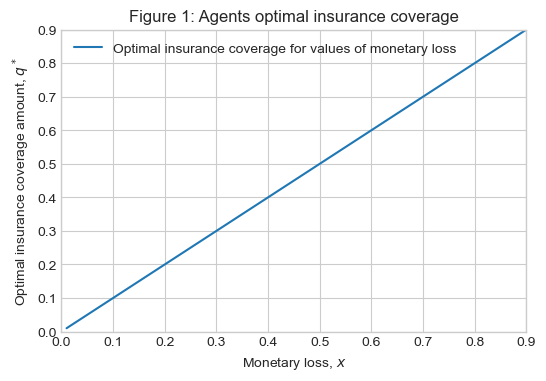

In [5]:
#Print figure
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(x_vec, q_value, label='Optimal insurance coverage for values of monetary loss')
ax.legend(loc='best')
ax.set_xlabel('Monetary loss, $x$')
ax.set_ylabel('Optimal insurance coverage amount, $q^*$')
ax.set_xlim([0,0.9])
ax.set_ylim([0,0.9])
ax.set_title('Figure 1: Agents optimal insurance coverage')
ax.grid(True)

We see from figure 1, that the agents optimal insurance coverage is when the agent is fully insured. This means that the agents coverage is equal to their monetary loss. 

# Question 2


**Subquestion 1**

In [6]:
# Defining variables

# Value of loss
x = 0.6 

# Insurrance coverage (ndarray)
q_vec = np.linspace(0.01, x, 1000)

#utility incase of no insurance
v_0 = par.p*u(par.y-x, par)+(1-par.p)*u(par.y, par)

**Subquestion 2**

In [7]:
# Optimize
def opt_pi(pi_tilde):
    """ acceptable premium policies
    args:
        pi_tilde (empty ndarray): input array
    return:
        opt_pi (ndarray): output array
    """
    
    # looping every q in q_vec into opt_pi
    for i,q in enumerate(q_vec):
        
        # Defining the objective function
        obj = lambda pi: diff(q, pi, x, par)
        
        # Calling the optimizer
        res = optimize.minimize_scalar(obj, bounds=(0,q), method = 'bounded')
        
        # Appending the value of res into pi_tilde
        pi_tilde[i] = res.x


# Defining an empty array for the values of res
pi_tilde=np.empty(q_vec.size)

# Applying value of pi_tilde into the acceptable premium policy
opt_pi(pi_tilde)
# Calculating the non optimized pi
pi = par.p*q_vec

**Subquestion 3**

Text(0.5, 1.0, 'Figure 2: Agent and company optimal insurance contract')

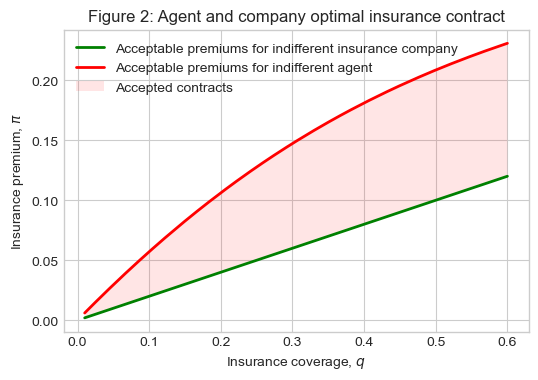

In [8]:
# Print figure
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)

ax.plot(q_vec,pi,ls='-',lw=2,color='green',label='Acceptable premiums for indifferent insurance company')
ax.plot(q_vec,pi_tilde,ls='-',lw=2,color='red',label='Acceptable premiums for indifferent agent')
ax.fill_between(q_vec, pi, pi_tilde, facecolor="red", alpha=0.1, label='Accepted contracts')

ax.set_xlabel('Insurance coverage, $q$')
ax.set_ylabel('Insurance premium, $\pi$')
ax.legend(loc='best',frameon=False);
ax.set_title('Figure 2: Agent and company optimal insurance contract')

Figure 2 illustrate the feasible contracts that both the agent and insurance company will accept. The green line illustrate where the insurance company is indifferent between offering an insurance contract and not. The red line illustrate the points where the agent will be indifferent between accepting the contract and not accepting. The agents indifference line is decreasing in the marginal return.

# Question 3

The montecarlo integration is the method for numerically estimating the integration of a function. 

**Subquestion 1**

In [9]:
# Setting seed
np.random.seed(1998)

# Drawing x's from a beta distrubution
x_beta = par.x_beta = np.random.beta(a=2,b=7,size=123456)


**Subquestion 2**

In [10]:
# Applying the montecarlo function to the two insurance cases
insurance_1 = montecarlo(0.9, 0.2, par)
insurance_2 = montecarlo(0.45, 0.11, par)

# Printing result
print("The utilility of insurance 1 is "+str(insurance_1)+" and the utility of insurance 2 is "+str(insurance_2))

if insurance_1>insurance_2:
    print("Insurance 1 is therefore preferable to the agent") 
else: 
    print("Insurance 2 is therefore preferable to the agent")

The utilility of insurance 1 is -1.286037151773258 and the utility of insurance 2 is -1.3149290217146714
Insurance 1 is therefore preferable to the agent


Once again, we see that the agent are biased towards full insurance by paying a higher premium for nearly full insurance. 

# Question 4

**Subquestion 1**

In [11]:
gamma = par.gamma=0.95

# Optimizing 
obj = lambda pi: np.absolute(montecarlo_insurance(pi, par) - montecarlo_noinsurance(par))
pi_star_guess = 0.1
res_q4 = optimize.root(obj, pi_star_guess, method = 'broyden1',)
pi_star = res_q4.x

# Printing output
print(f'Profit maximizing premium is : {pi_star:.5f}')

Profit maximizing premium is : 0.23834


We see that the profit maximizing premium is at 0,238, which is the premium that makes the agent indifferent between having 95% coverage and no coverage. Furthermore, we see that the result is consistent with the answer in 4.2, where the agent is willing to pay a relatively higher insurance premium with regards to the coverage. 
